In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd

In [7]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [8]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [9]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# reflect an existing database into a new model
Initial_Base = automap_base()

# reflect the tables
Initial_Base.prepare(engine, reflect=True)


In [11]:
# We can view all of the classes that automap found
Initial_Base.classes.keys()


['measurement', 'station']

In [12]:
# Save references to each table
Measurement_Initial_Base = Initial_Base.classes.measurement
Station_Initial_Base = Initial_Base.classes.station

In [24]:
# Check to see if the information can be collected.
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [25]:
# Create our session (link) from Python to the DB
link = Session(engine)

In [26]:
# Check what is the final day in the set.
final_date = link.query(Measurement_Initial_Base.date).order_by(Measurement_Initial_Base.date.desc()).first()
print(final_date)

('2017-08-23',)


# Exploratory Climate Analysis

2016-08-23
('2017-08-23',)


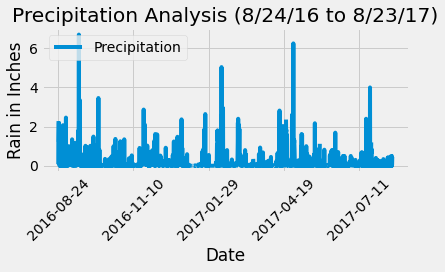

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_year)
last_date = link.query(Measurement_Initial_Base.date).order_by(Measurement_Initial_Base.date.desc()).first()
print(last_date)
rain = link.query(Measurement_Initial_Base.date, Measurement_Initial_Base.prcp).\
    filter(Measurement_Initial_Base.date > last_year).\
    order_by(Measurement_Initial_Base.date).all()
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
rain_df = pd.DataFrame(rain)
rain_df.set_index('date').head()

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
rain_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis (8/24/16 to 8/23/17)")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [29]:
# Design a query to show how many stations are available in this dataset?
locations = link.query(Measurement_Initial_Base).group_by(Measurement_Initial_Base.station).count()
print("There are {} stations.".format(locations))

There are 9 stations.


In [30]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
results = link.query(Measurement_Initial_Base.station, func.count(Measurement_Initial_Base.station)).\
group_by(Measurement_Initial_Base.station).\
order_by(func.count(Measurement_Initial_Base.station).desc()).all()
results

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel = [Measurement_Initial_Base.station, 
       func.min(Measurement_Initial_Base.tobs),
      func.max(Measurement_Initial_Base.tobs),
    func.avg(Measurement_Initial_Base.tobs)]

min_max_avg_tmp=link.query(*sel).group_by(Measurement_Initial_Base.station). \
order_by(func.count(Measurement_Initial_Base.station).desc()).first()
min_max_avg_tmp


('USC00519281', 54.0, 85.0, 71.66378066378067)

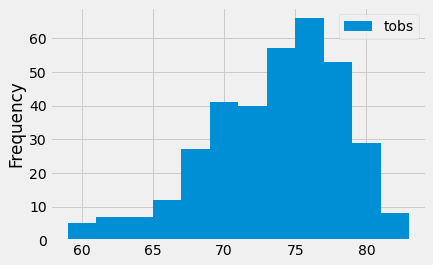

In [32]:
 # Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
top_station=min_max_avg_tmp[0]

tobs_top_station=link.query(Measurement_Initial_Base.date, Measurement_Initial_Base.tobs).\
filter(Measurement_Initial_Base.station==top_station).\
filter(Measurement_Initial_Base.date>=last_year).\
order_by(Measurement_Initial_Base.date).all()

df_top_station_tobs=pd.DataFrame(tobs_top_station,columns=['date','tobs'])


df_top_station_tobs.plot.hist(bins=12)
plt.show()


## Bonus Challenge Assignment

In [53]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = link.query(Measurement_Initial_Base.tobs).\
order_by(Measurement_Initial_Base.tobs).\
filter(Measurement_Initial_Base.date < "2017-08-24").\
filter(Measurement_Initial_Base.date > "2016-08-23").\
filter(Measurement_Initial_Base.station==most_active).all()
y = list(np.ravel(results))


[59.0, 59.0, 59.0, 60.0, 60.0, 61.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 63.0, 63.0, 63.0, 63.0, 64.0, 64.0, 64.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 66.0, 66.0, 66.0, 66.0, 66.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 71.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.0, 74.

In [22]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [23]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [24]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
